# UGAGU CHINEMEREM
## The Sparks Foundation Data Science and Business Analytics Task 4
### Dataset : [https://bit.ly/2TK5Xn5]
#### Topic : Exploratory Data Analysis (EDA) - Terrorism LEVEL-INTERMEDIATE


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Libraries imported Data set is to be read

In [48]:
df= pd.read_csv('terrorism.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [50]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [51]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [52]:
dv = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [53]:
dv.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [54]:
df.isnull().sum()

eventid            0
Year               0
Month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [56]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [57]:
df['Casualities'] = df['kill'] + df['Wound']
df.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


## Number of Casuality per region

In [58]:
df1=df.groupby('Region')['Casualities'].sum()
df2=df1.to_frame()
df2.reset_index()

,Region,Casualities
0,Australasia & Oceania,410.0
1,Central America & Caribbean,37699.0
2,Central Asia,3009.0
3,East Asia,10365.0
4,Eastern Europe,19460.0
5,Middle East & North Africa,351950.0
6,North America,26447.0
7,South America,45553.0
8,South Asia,242679.0
9,Southeast Asia,41896.0


In [59]:
df1.max()

351950.0

####  Middle East and North africa has the highest casualty with 	351950

In [60]:
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [61]:
dv1=df.groupby('Year')['Casualities'].sum()
dv2=dv1.to_frame()
dv2.reset_index()

,Year,Casualities
0,1970,386.0
1,1971,255.0
2,1972,975.0
3,1973,865.0
4,1974,1404.0
5,1975,1234.0
6,1976,1430.0
7,1977,974.0
8,1978,3059.0
9,1979,4606.0


In [62]:
dv2.max()

Casualities    85618.0
dtype: float64

#### 2014 had the highest attacks with 85618 Casualties

In [63]:
df['Country'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
International            1
St. Lucia                1
New Hebrides             1
South Vietnam            1
Wallis and Futuna        1
Name: Country, Length: 205, dtype: int64

## DATA VISUALIZATION

In [64]:
df.corr()

,eventid,Year,Month,day,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605,0.020684
Year,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596,0.020675
Month,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336,0.003805
day,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199,-0.001808
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767,-0.004570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051,0.030027
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811,0.031764
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193,-0.007716
INT_ANY,-0.175605,-0.175596,-0.006336,-0.001199,0.080767,0.153118,-0.047900,-0.041530,0.002497,0.061389,...,0.053484,0.007275,0.056438,-0.061946,0.064759,0.891051,0.893811,0.252193,1.000000,0.023423


In [65]:
dv.corr()

,Year,Month,day,latitude,longitude,kill,Wound
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wound,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


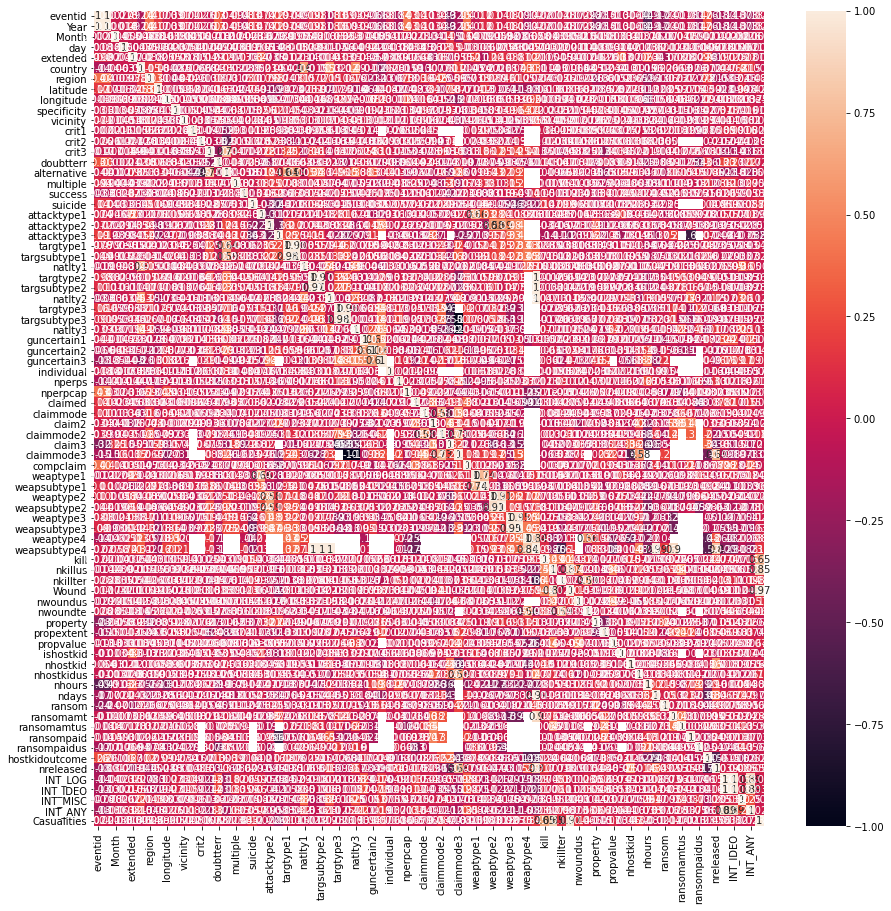

In [66]:
fig,axes = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(df.corr(), annot =True)
plt.show()

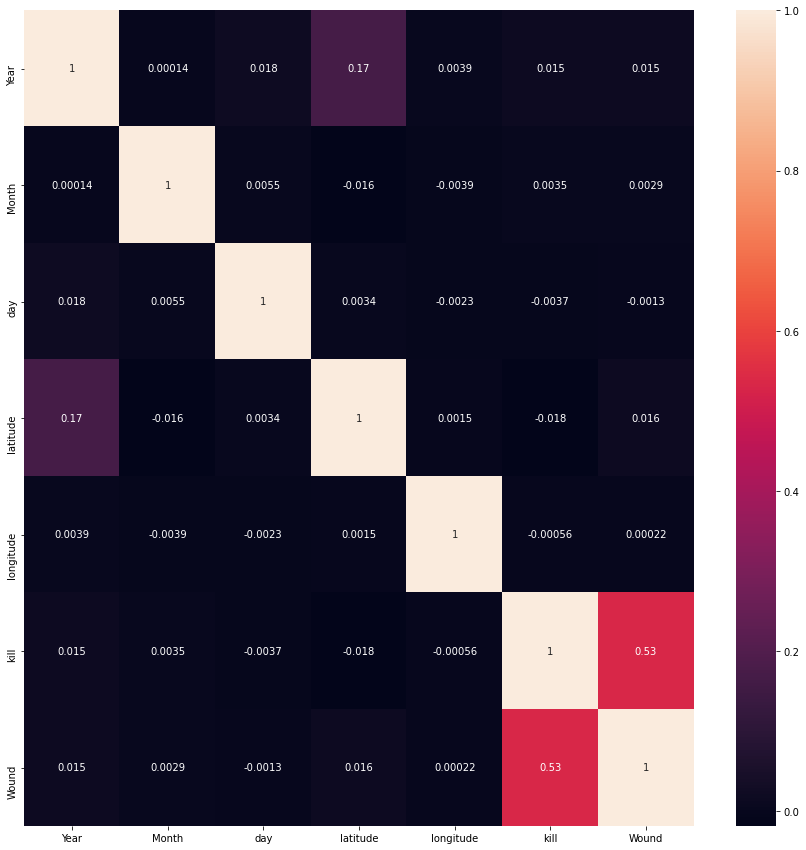

In [67]:
fig,axes = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(dv.corr(), annot =True)
plt.show()

### Year  and Month with Maximum attacks

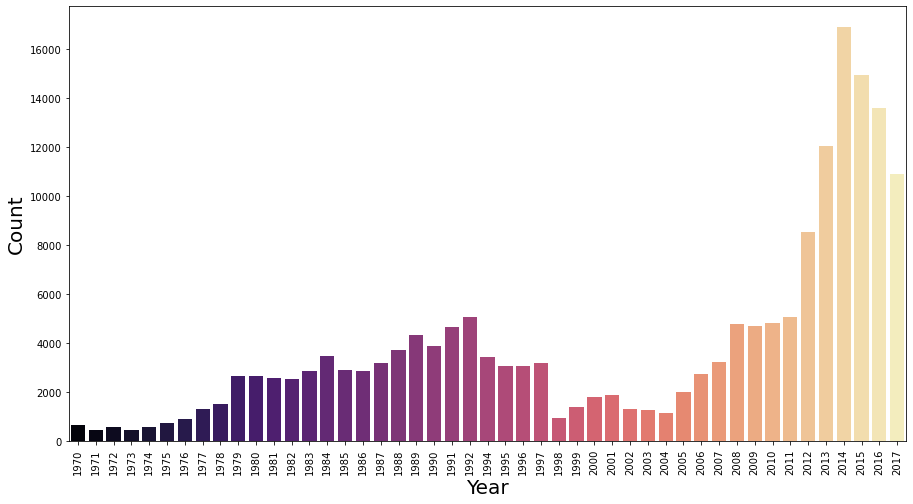

In [68]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'Year',palette='magma')
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

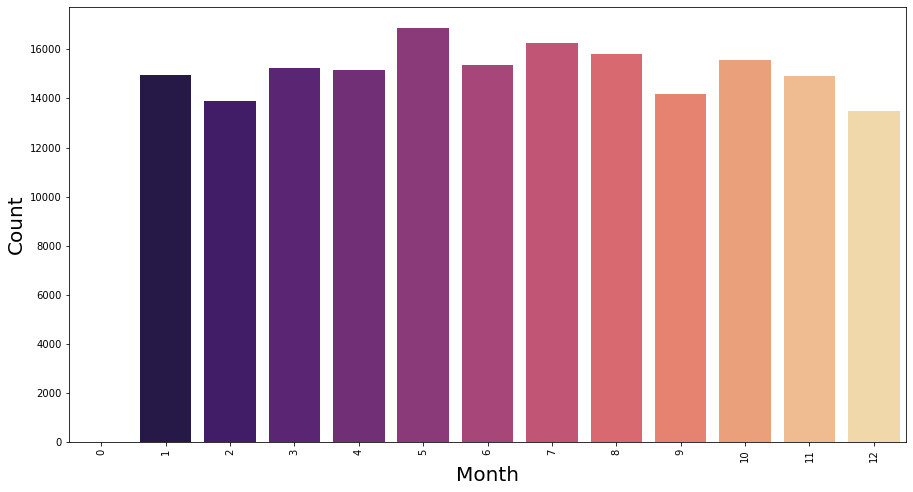

In [69]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'Month',palette='magma')
plt.xticks(rotation=90)
plt.xlabel("Month",size=20)
plt.ylabel("Count",size=20)
plt.show()

### Rate of Attack of region by Year

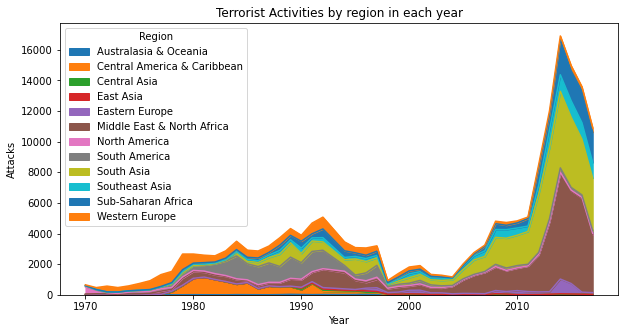

In [74]:
df_region=pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()

### Rate of Casualty of region by Year

Text(0, 0.5, 'Casualities')

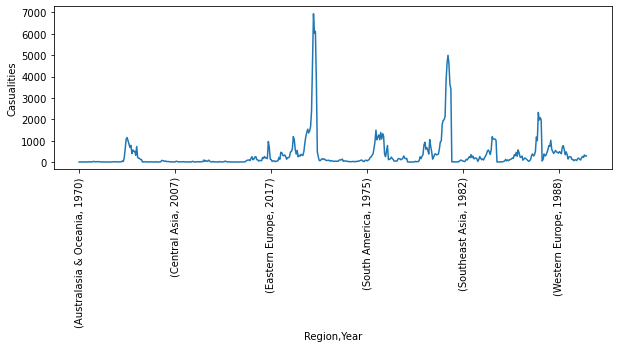

In [75]:
plt.subplots(figsize=(10,3))
df.groupby(['Region', 'Year']).count()['Casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

##  Attack Types

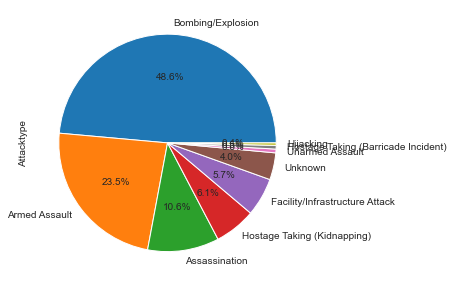

In [134]:
plt.figure(figsize=(5,5))
df['Attacktype'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

## Terrorist Group and affected locations

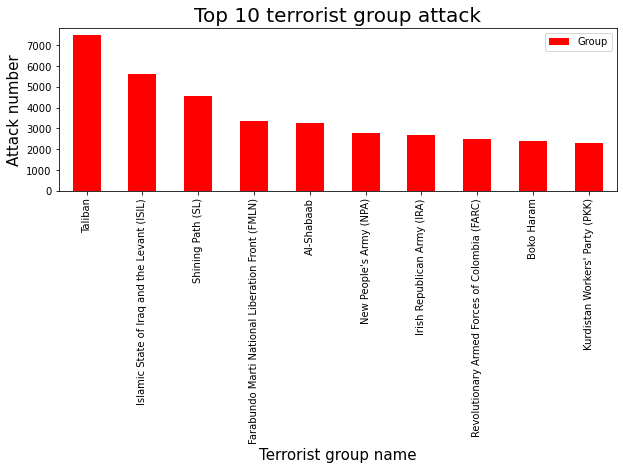

In [76]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(10,3))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

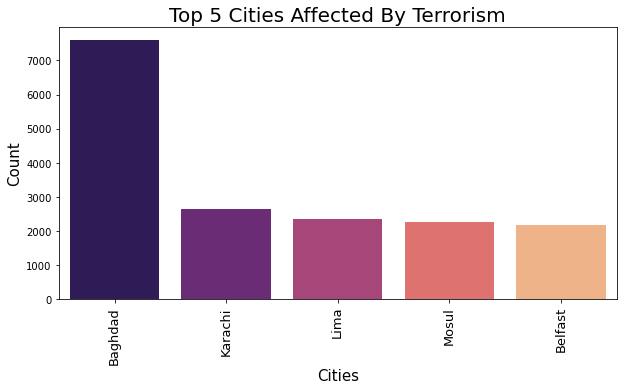

In [73]:
plt.figure(figsize=(10,5))
x =df['City'].value_counts().index[1:6]
y =df['City'].value_counts().values[1:6]
sns.barplot(x,y,palette='magma')
plt.title('Top 5 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

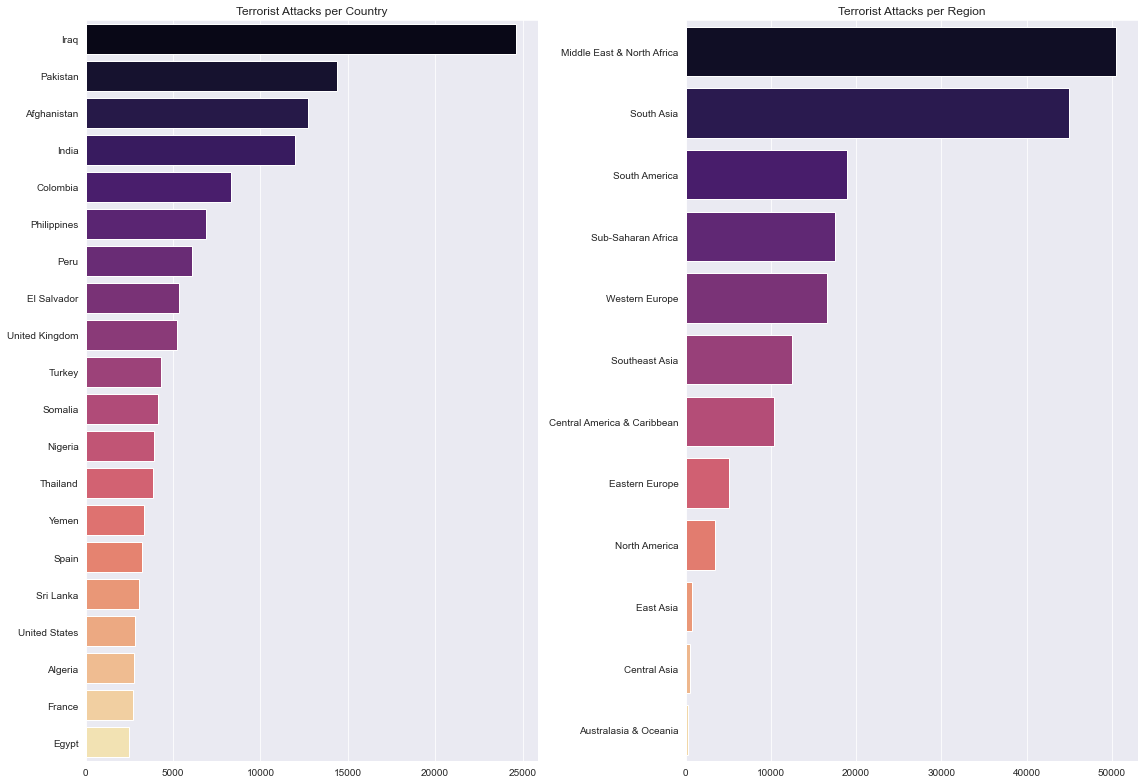

In [137]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1],palette = 'magma')
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### Countries in the Middle East has high attacks 

## Target

In [78]:
Target = df['Targettype'].value_counts().nlargest(n=15)
Target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Targettype, dtype: int64

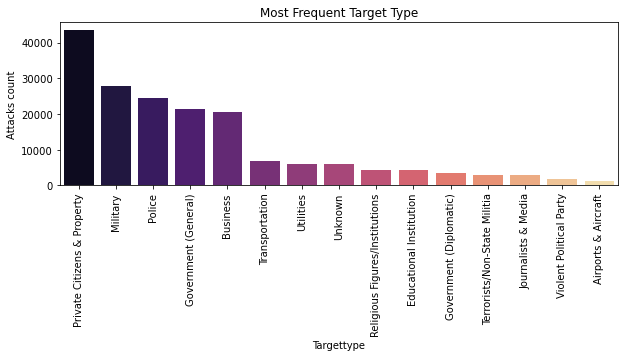

In [80]:
plt.figure(figsize= (10,3))
sns.barplot(x = Target.index , y = Target.values ,palette='magma')
plt.title('Most Frequent Target Type')
plt.xlabel('Targettype')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Private Citizens & Property has the highest attack

## Suicide and Success outcome

0    175058
1      6633
Name: suicide, dtype: int64


Text(0.5, 1.0, 'Suicide Outcome')

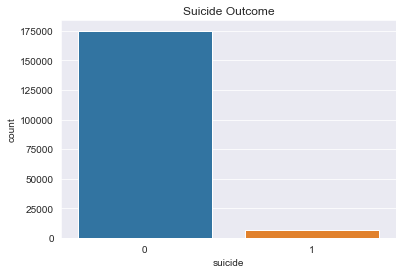

In [140]:
sns.set_style('darkgrid')
print(df.suicide.value_counts())
sns.countplot('suicide',data=df).set_title('Suicide Outcome')

1    161632
0     20059
Name: success, dtype: int64


Text(0.5, 1.0, 'Success Outcome')

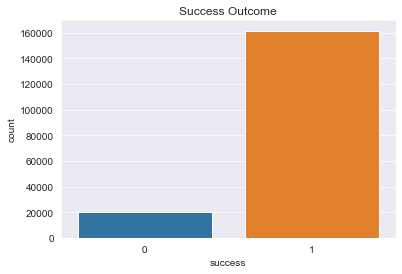

In [146]:
sns.set_style('darkgrid')
print(df.success.value_counts())
sns.countplot('success',data=df).set_title('Success Outcome')

## Rate of Wounds and Kills by Country

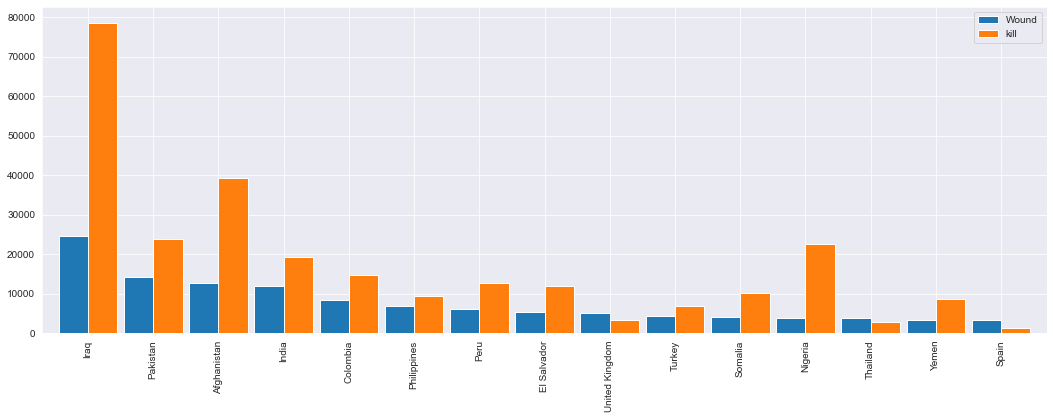

In [145]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Wound']
data=df.groupby('Country')['kill'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Conclusion and Results :

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa

Year with the most attacks: 2014

Month with the most attacks: 5

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion

# Thank you 